# Práctico 2: Regresión

## Imports

In [ ]:
# Mathematics
import math
import random

# Scientific computing
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar
import tqdm

# Machine learning
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

# Diabetes dataset
from sklearn.datasets import load_diabetes

# Data analysis and manipulation
import pandas as pd
pd.set_option('display.precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

## Ejemplo visto en clase: cultivo de papas

### Datos

In [3]:
# Cargamos los datos
papas = pd.read_csv('Papas.csv')
papas

NameError: name 'pd' is not defined

In [4]:
papas.describe()

NameError: name 'papas' is not defined

In [5]:
papas.corr()

NameError: name 'papas' is not defined

In [6]:
scatter_plot = sns.scatterplot(data=papas, x="Lluvia", y="Rendimiento")
scatter_fig = scatter_plot.get_figure()
scatter_fig.savefig('Papas.png')

NameError: name 'sns' is not defined

In [7]:
# Pasamos a numpy para trabajar con sklearn
X = np.array(papas['Lluvia']).reshape(-1, 1)
y = np.array(papas['Rendimiento']).reshape(-1, 1)

NameError: name 'papas' is not defined

### Regresión lineal

#### Regresión lineal simple

##### Entrenamiento

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

NameError: name 'LinearRegression' is not defined

In [9]:
y_pred = lin_reg.predict(X)

NameError: name 'lin_reg' is not defined

In [10]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

NameError: name 'y' is not defined

In [11]:
# Coeficientes
w0 = lin_reg.intercept_
w1 = lin_reg.coef_
print(w0,w1)

NameError: name 'lin_reg' is not defined

In [12]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

NameError: name 'mean_squared_error' is not defined

In [13]:
# Coeficiente de determinación
lin_reg.score(X,y)

NameError: name 'lin_reg' is not defined

##### Gráfico de la hipótesis obtenida

In [14]:
K=1
lin_reg_plot = sns.lmplot(x ="Lluvia", y ="Rendimiento", data = papas, order = K, ci = None, line_kws = {"color":"C1"})
plt.title("Regresión lineal con K="+str(K))
lin_reg_plot.savefig('Papas_LR_K_'+str(K)+'.png')

NameError: name 'sns' is not defined

##### Curvas de nivel de la función de pérdida

In [15]:
res = 300
lin_w0 = np.linspace(10.0, 20.0, res)
lin_w1 = np.linspace(0.0, 0.08, res)

In [16]:
W0, W1 = np.meshgrid(lin_w0, lin_w1)

In [17]:
L=np.zeros(W0.shape)

for i in range(res):
    for j in range(res):
        w0 = W0[i,j]
        w1 = W1[i,j]
        L[i,j] = np.sum(np.square(X*w1+w0-y))

NameError: name 'X' is not defined

/tmp/ipykernel_11303/3462788370.py:2: UserWarning: No contour levels were found within the data range.
  cp = plt.contour(W0, W1, L, levels, colors='black', linestyles='dashed', linewidths=1)


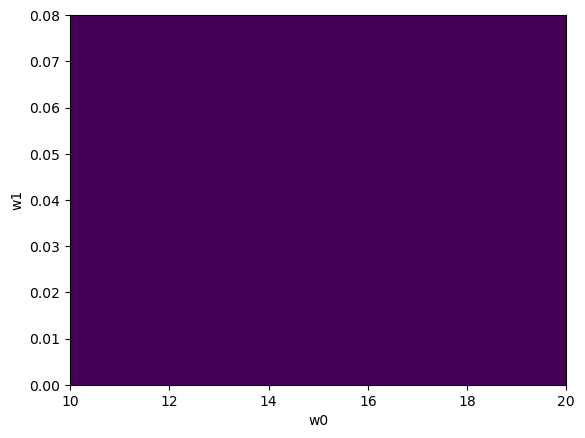

In [18]:
levels = [0, 50, 100, 150, 200.0, 250, 300.0, 350, 400, 500.0, 600.0, 700.0, 1200.0, 3000.0, 4000]
cp = plt.contour(W0, W1, L, levels, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(W0, W1, L, levels)
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()

#### Regresión lineal con polinomios

##### Entrenamiento

In [19]:
# Elegimos el grado
K = 2

In [20]:
# Obtenemos los features
poly = PolynomialFeatures(degree=K, include_bias=False)
X_poly = poly.fit_transform(X)

NameError: name 'PolynomialFeatures' is not defined

In [21]:
X_poly

NameError: name 'X_poly' is not defined

In [22]:
# Escalamos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_poly)

NameError: name 'StandardScaler' is not defined

In [71]:
X_norm

array([[-0.035, -0.228],
       [-0.238, -0.405],
       [0.112, -0.090],
       [1.837, 2.169],
       [1.533, 1.685],
       [0.247, 0.045],
       [-0.068, -0.259],
       [-0.441, -0.566],
       [-1.737, -1.213],
       [-1.331, -1.082],
       [0.935, 0.842],
       [-0.768, -0.792],
       [-0.903, -0.873],
       [-0.441, -0.566],
       [1.296, 1.334]])

In [72]:
poly_reg = LinearRegression()
poly_reg.fit(X_norm, y)

LinearRegression()

In [73]:
y_pred = poly_reg.predict(X_norm)

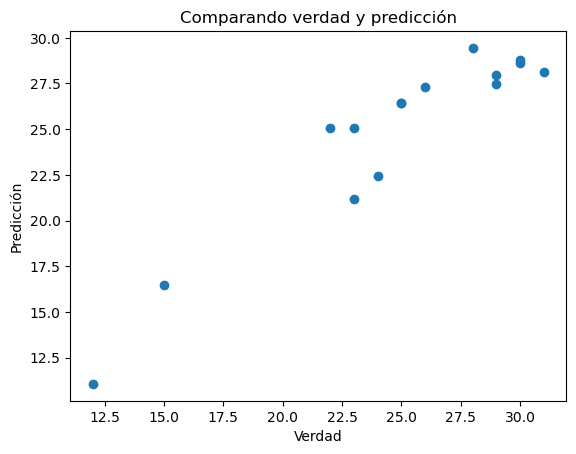

In [74]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [75]:
# Coeficientes
w0 = poly_reg.intercept_
w1 = poly_reg.coef_
print(w0,w1)

[24.800] [[18.078 -14.564]]


In [76]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

1.7393834940989026

In [78]:
# Coeficiente de determinación
poly_reg.score(X_norm,y)

0.8904878762230801

##### Gráfico de la hipótesis obtenida

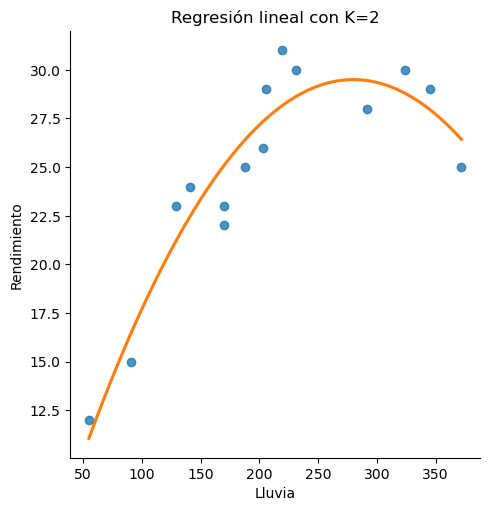

In [79]:
poly_reg_plot = sns.lmplot(x ="Lluvia", y ="Rendimiento", data = papas, order = K, ci = None, line_kws = {"color":"C1"})
plt.title("Regresión lineal con K="+str(K))
poly_reg_plot.savefig('Papas_LR_K_'+str(K)+'.png')

##### RMSE y tamaño de los coeficientes en función del grado

In [82]:
sizes = []
rmses = []

for K in range(1,13):
    poly = PolynomialFeatures(degree=K, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X_poly)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_norm, y)
    y_pred = poly_reg.predict(X_norm)
    rmses.append(np.sqrt(mean_squared_error(y,y_pred)))
    sizes.append(np.mean(np.abs(poly_reg.coef_)))

In [83]:
rmses

[3.574982829783192,
 1.7393834940989026,
 1.6738965609988057,
 1.6709809925814132,
 1.670894564982928,
 1.6612502379291325,
 1.0806769780458696,
 0.702630295076563,
 0.6815302613729095,
 0.5720983074782818,
 0.5528533017599273,
 0.4554859163996859]

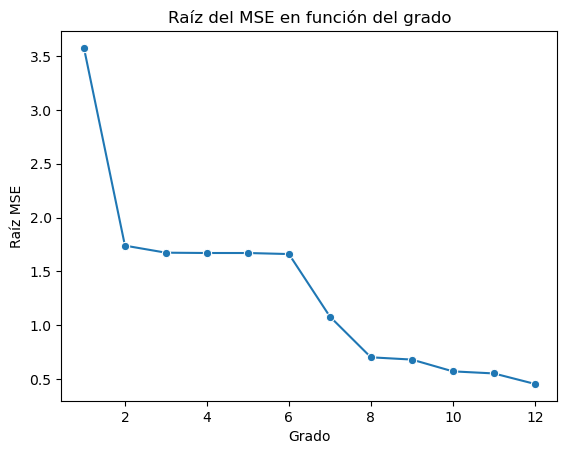

In [84]:
df_rmse = pd.DataFrame({"Grado":range(1,13), "Raíz MSE":rmses})
line_plot_rmse = sns.lineplot(
    data=df_rmse,
    x="Grado", y="Raíz MSE",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Raíz del MSE en función del grado")
line_plot_fig = line_plot_rmse.get_figure()
line_plot_fig.savefig('Papas_rmse.png')

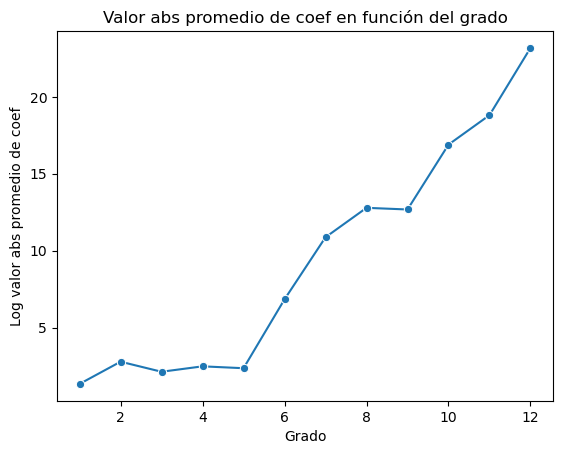

In [85]:
df_sizes = pd.DataFrame({"Grado":range(1,13), "Log valor abs promedio de coef":np.log(sizes)})
line_plot_sizes = sns.lineplot(
    data=df_sizes,
    x="Grado", y="Log valor abs promedio de coef",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Valor abs promedio de coef en función del grado")
line_plot_fig = line_plot_sizes.get_figure()
line_plot_fig.savefig('Papas_sizes.png')

### K vecinos más cercanos

#### Entrenamiento

In [120]:
# Elegimos el k
k=1

In [121]:
# Debemos elegir la distancia
knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')

In [122]:
knn_reg

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [123]:
knn_reg.fit(X,y)

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [125]:
y_pred = knn_reg.predict(X)

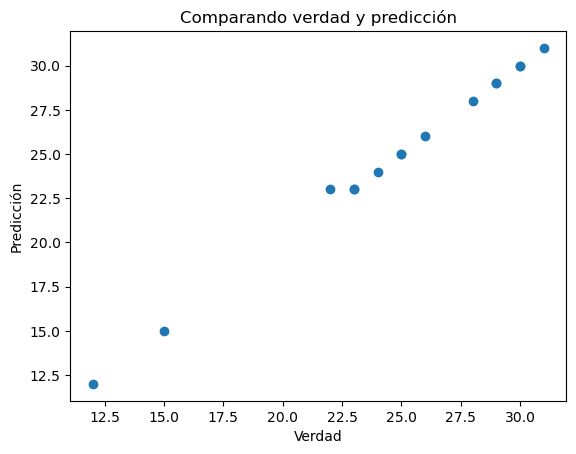

In [126]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [127]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

0.2581988897471611

#### Graficamos la hipótesis obtenida

In [90]:
X_ax = np.array(range(50,378)).reshape(-1, 1)
pred_y = knn_reg.predict(X_ax)

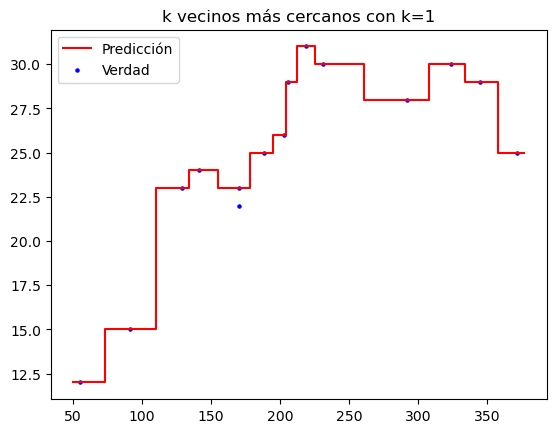

In [91]:
plt.step(X_ax, pred_y, lw=1.5, color="red", label="Predicción")
plt.scatter(X, y, s=5, color="blue", label="Verdad")
plt.legend()
plt.title('k vecinos más cercanos con k='+str(k))
plt.savefig('knn_Papas_k_'+str(k)+'.png')

#### RMSE en función de k

In [92]:
rmses = []

for k in range(1,16):
    
    knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_reg.fit(X,y)
    
    y_pred = knn_reg.predict(X)
    rmses.append(np.sqrt(mean_squared_error(y,y_pred)))

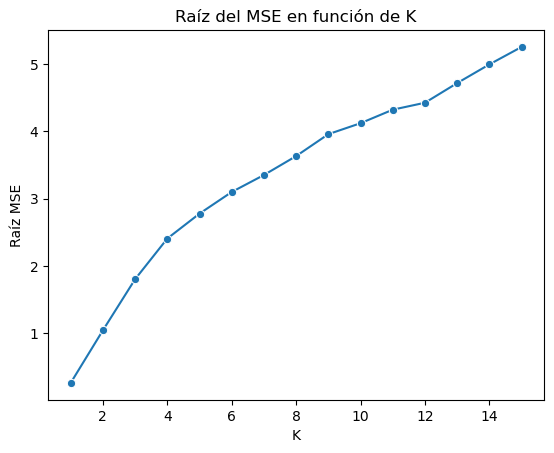

In [93]:
df_rmse = pd.DataFrame({"K":range(1,16), "Raíz MSE":rmses})
line_plot_rmse = sns.lineplot(
    data=df_rmse,
    x="K", y="Raíz MSE",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Raíz del MSE en función de K")
line_plot_fig = line_plot_rmse.get_figure()
line_plot_fig.savefig('knn_rmse.png')

#### Curse of dimensionality

In [100]:
def random_point(dim):
    return np.array([random.random() for _ in range(dim)])

In [101]:
def distance(v, w):
    """Calcula la distancia entre v y w"""
    return math.sqrt(np.sum(np.square(v-w)))

In [102]:
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

In [103]:
dimensions = range(1, 101)
avg_distances = []
min_distances = []
random.seed(0)

for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10000) # 10,000 distancias random
    avg_distances.append(sum(distances) / 10000) # promedio
    min_distances.append(min(distances)) # minimo

Curse of Dimensionality: 100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


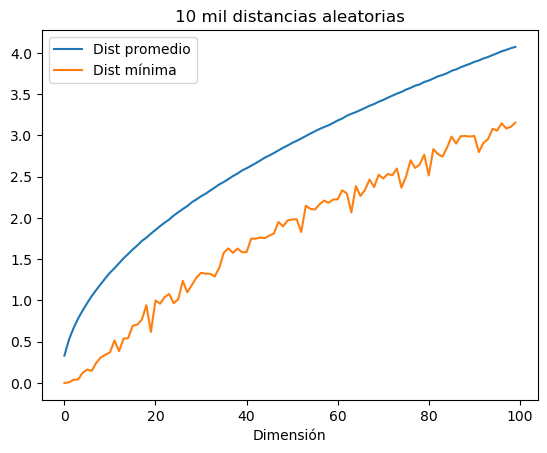

In [104]:
plt.plot(avg_distances, label = "Dist promedio")
plt.plot(min_distances, label = "Dist mínima")
plt.xlabel("Dimensión")
plt.title("10 mil distancias aleatorias")
plt.legend()
plt.savefig("knn_curse_1.png")

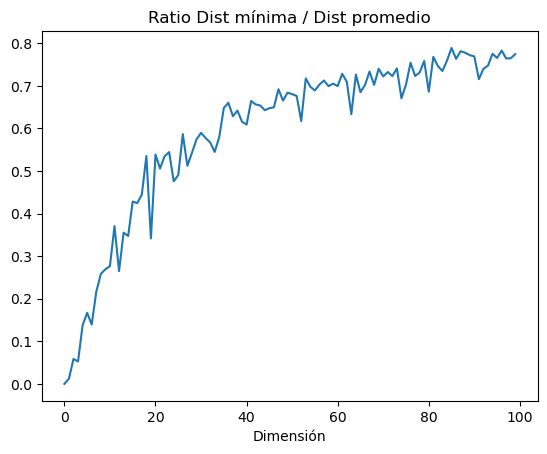

In [105]:
ratio = [min_distances[i]/avg_distances[i] for i in range(len(avg_distances))]
plt.plot(ratio)
plt.xlabel("Dimensión")
plt.title("Ratio Dist mínima / Dist promedio")
plt.savefig("knn_curse_2.png")

### Árboles de decisión

#### Profundidad = 0

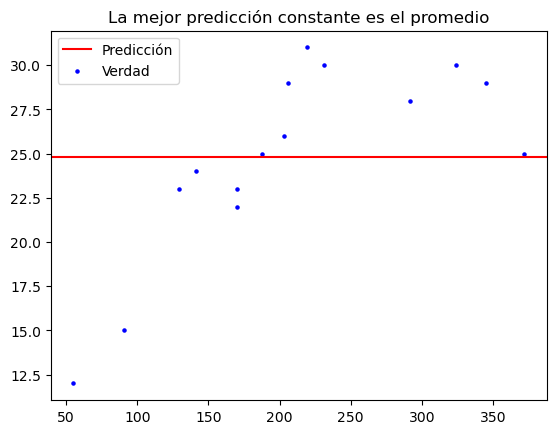

In [106]:
plt.axhline(y=np.mean(y), lw=1.5, color="red", label="Predicción")
plt.scatter(X, y, s=5, color="blue", label="Verdad")
plt.legend()
plt.title('La mejor predicción constante es el promedio')
plt.savefig('constante_Papas.png')

#### Profundidad = 1

In [107]:
X_ast = range(50,378)

rss = []

for x_ast in X_ast:
    c1 = papas.loc[papas['Lluvia']<x_ast,'Rendimiento'].mean()
    c2 = papas.loc[papas['Lluvia']>=x_ast,'Rendimiento'].mean()
    r = ((papas.loc[papas['Lluvia']<x_ast,'Rendimiento']-c1)**2).sum()+((papas.loc[papas['Lluvia']>=x_ast,'Rendimiento']-c2)**2).sum()
    rss.append(r)

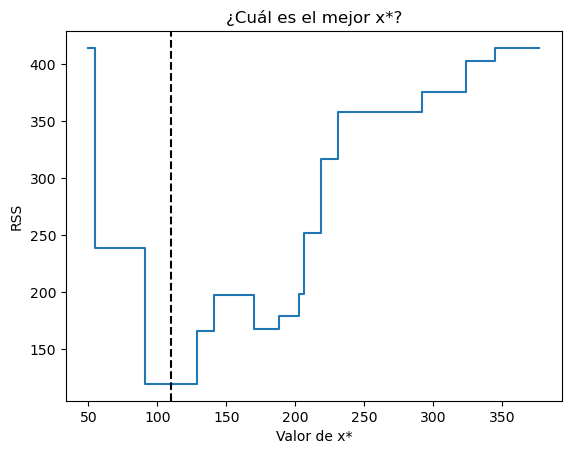

In [108]:
plt.step(X_ast,rss)
plt.axvline(x=((91+129)/2),linestyle='dashed',color='black')
plt.xlabel('Valor de x*')
plt.ylabel('RSS')
plt.title('¿Cuál es el mejor x*?')
plt.savefig('mejor_x_ast.png')

In [109]:
def h(x):
    if x < (91+129)/2:
        return papas.loc[papas['Lluvia']<(91+129)/2,'Rendimiento'].mean()
    else:
        return papas.loc[papas['Lluvia']>=(91+129)/2,'Rendimiento'].mean()

In [110]:
vec_h = [h(x) for x in X_ast]

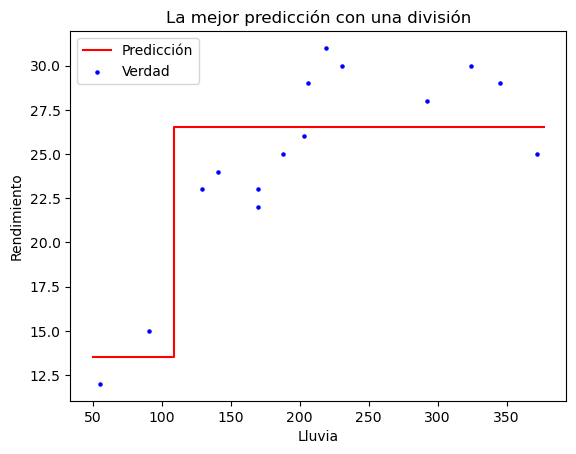

In [111]:
plt.step(X_ax, vec_h, lw=1.5, color="red", label="Predicción")
plt.scatter(X, y, s=5, color="blue", label="Verdad")
plt.legend()
plt.xlabel('Lluvia')
plt.ylabel('Rendimiento')
plt.title('La mejor predicción con una división')
plt.savefig('mejor_division.png')

#### Entrenamiento

In [129]:
# Elegimos la profundidad
depth=1

In [130]:
tree_reg = DecisionTreeRegressor(max_depth=depth)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=1)

In [131]:
y_pred = tree_reg.predict(X)

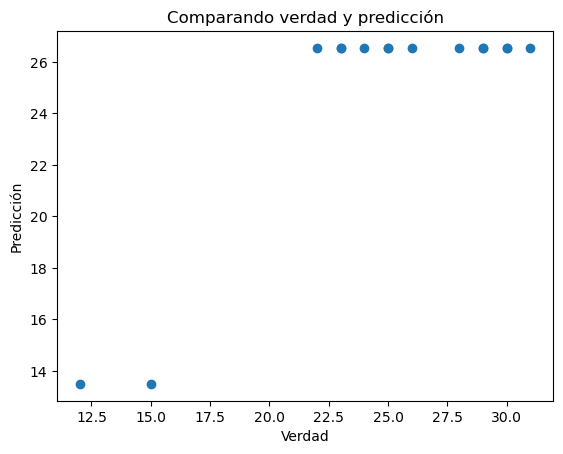

In [132]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [133]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

2.8252524280232523

#### Graficamos la hipótesis obtenida

In [134]:
X_ax = np.array(range(50,378)).reshape(-1, 1)
y_pred = tree_reg.predict(X_ax)

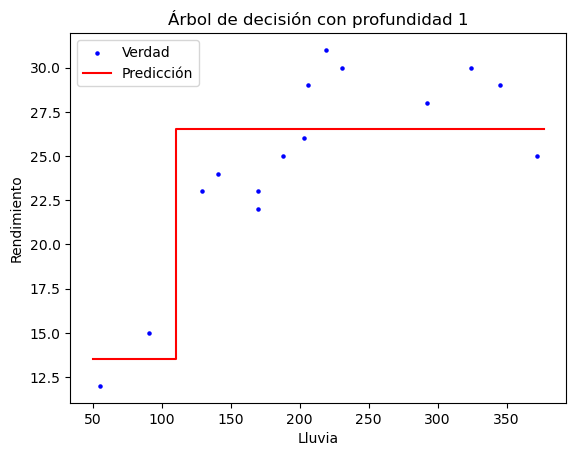

In [135]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=5, color="blue", label="Verdad")
plt.step(X_ax, y_pred, lw=1.5, color="red", label="Predicción")
plt.xlabel("Lluvia")
plt.ylabel("Rendimiento")
plt.title("Árbol de decisión con profundidad "+str(depth))
plt.legend()
plt.savefig('arbol_depth_'+str(depth)+'.png')

## Diabetes dataset

In [136]:
diabetes = load_diabetes()

In [137]:
# diabetes es un objeto tipo diccionario
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [138]:
# Tipos de los items
keys = list(diabetes.keys())
for k in range(len(keys)):
    print("Type of diabetes." + str(keys[k]) + " :", type(diabetes[keys[k]])) 

Type of diabetes.data : <class 'numpy.ndarray'>
Type of diabetes.target : <class 'numpy.ndarray'>
Type of diabetes.frame : <class 'NoneType'>
Type of diabetes.DESCR : <class 'str'>
Type of diabetes.feature_names : <class 'list'>
Type of diabetes.data_filename : <class 'str'>
Type of diabetes.target_filename : <class 'str'>
Type of diabetes.data_module : <class 'str'>


In [139]:
# Item de descripción
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [140]:
# Nombres de las features o variables predictoras
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [141]:
# Extraemos los numpy arrays
X = diabetes.data 
y = diabetes.target

In [142]:
print("Atributos de X")
print(
'''\
type: {}
dtype: {}
ndim: {}
shape: {}
size: {}
itemsize: {}
nbytes: {}\
'''.format(type(X),X.dtype,X.ndim,X.shape,X.size,X.itemsize,X.nbytes)
)

Atributos de X
type: <class 'numpy.ndarray'>
dtype: float64
ndim: 2
shape: (442, 10)
size: 4420
itemsize: 8
nbytes: 35360


In [143]:
# Primeras 10 filas
X[0:10,:]

array([[0.038, 0.051, 0.062, 0.022, -0.044, -0.035, -0.043, -0.003,
        0.020, -0.018],
       [-0.002, -0.045, -0.051, -0.026, -0.008, -0.019, 0.074, -0.039,
        -0.068, -0.092],
       [0.085, 0.051, 0.044, -0.006, -0.046, -0.034, -0.032, -0.003,
        0.003, -0.026],
       [-0.089, -0.045, -0.012, -0.037, 0.012, 0.025, -0.036, 0.034,
        0.023, -0.009],
       [0.005, -0.045, -0.036, 0.022, 0.004, 0.016, 0.008, -0.003,
        -0.032, -0.047],
       [-0.093, -0.045, -0.041, -0.019, -0.069, -0.079, 0.041, -0.076,
        -0.041, -0.096],
       [-0.045, 0.051, -0.047, -0.016, -0.040, -0.025, 0.001, -0.039,
        -0.063, -0.038],
       [0.064, 0.051, -0.002, 0.067, 0.091, 0.109, 0.023, 0.018, -0.036,
        0.003],
       [0.042, 0.051, 0.062, -0.040, -0.014, 0.006, -0.029, -0.003,
        -0.015, 0.011],
       [-0.071, -0.045, 0.039, -0.033, -0.013, -0.035, -0.025, -0.003,
        0.068, -0.014]])

In [145]:
print("Atributos de y")
print(
'''\
type: {}
dtype: {}
ndim: {}
shape: {}
size: {}
itemsize: {}
nbytes: {}\
'''.format(type(y),y.dtype,y.ndim,y.shape,y.size,y.itemsize,y.nbytes)
)

Atributos de y
type: <class 'numpy.ndarray'>
dtype: float64
ndim: 1
shape: (442,)
size: 442
itemsize: 8
nbytes: 3536


In [146]:
# Primeros 10 elementos
y[0:10]

array([151.000, 75.000, 141.000, 206.000, 135.000, 97.000, 138.000,
       63.000, 110.000, 310.000])

### Manipulación usando Pandas

In [158]:
# Seleccionamos bmi y bp como variables
X2 = X[:,2:4]

In [160]:
# Convertimos a pandas dataframe 
df = pd.DataFrame(data=X2, columns=diabetes.feature_names[2:4])
df['target'] = pd.Series(y, dtype='float')

In [161]:
# Tipo de objeto creado
type(df)

pandas.core.frame.DataFrame

In [162]:
# Número de filas en el data frame
len(df)

442

In [163]:
# Número de filas y columnas en el data frame
df.shape

(442, 3)

In [164]:
# Visualización
df

,bmi,bp,target
0,0.06,2.19e-02,151.0
1,-0.05,-2.63e-02,75.0
2,0.04,-5.67e-03,141.0
3,-0.01,-3.67e-02,206.0
4,-0.04,2.19e-02,135.0
...,...,...,...
437,0.02,5.97e-02,178.0
438,-0.02,-6.76e-02,104.0
439,-0.02,1.73e-02,132.0
440,0.04,1.22e-03,220.0


In [165]:
df.corr()

,bmi,bp,target
bmi,1.00,0.40,0.59
bp,0.40,1.00,0.44
target,0.59,0.44,1.00


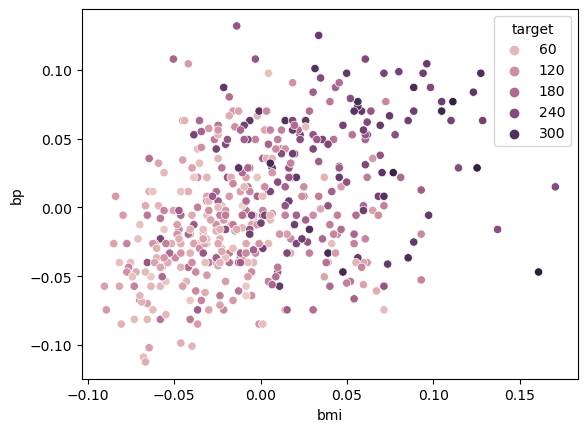

In [166]:
sns.scatterplot(df, x='bmi',y='bp',hue='target')
plt.show()

### K vecinos más cercanos

In [200]:
# Entrenamos
k=1
knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_reg.fit(X2,y)

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [201]:
y_pred = knn_reg.predict(X2)

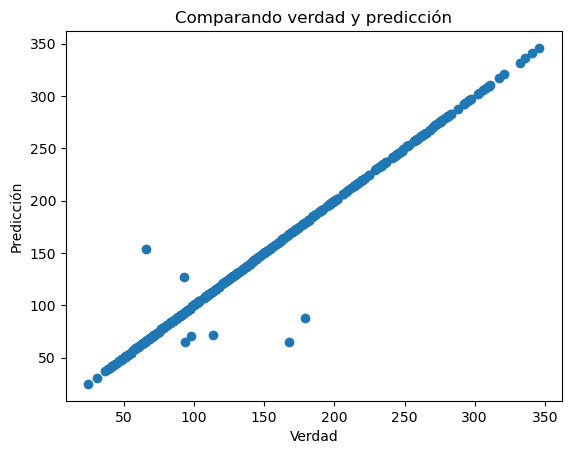

In [202]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [203]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

8.39144144904558

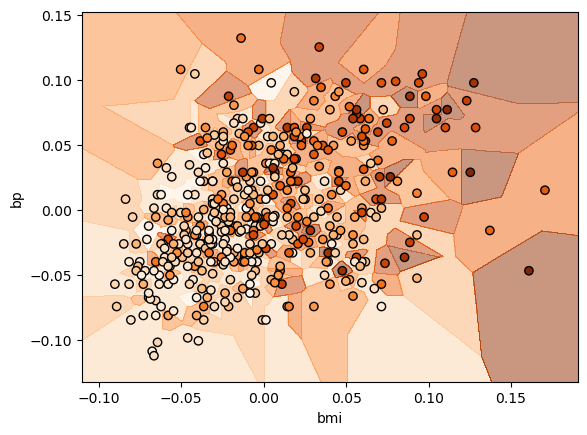

In [204]:
# Graficamos la hipotesis obtenida
ax = plt.subplot(1, 1, 1)
disp=DecisionBoundaryDisplay.from_estimator(
    knn_reg,
    X2,
    response_method="predict",
    ax=ax,
    xlabel=diabetes.feature_names[2],
    ylabel=diabetes.feature_names[3],
    eps=0.02,
    grid_resolution = 1000,
    alpha=0.5, 
    cmap='Oranges'
    )

# Plotting the data points    
disp.ax_.scatter(X2[:, 0], X2[:, 1], 
                 c=y, edgecolor="k",
                 cmap='Oranges')
plt.show()

### Árboles de decisión

In [205]:
# Entrenamos
depth=3
regtree = DecisionTreeRegressor(max_depth=depth)
regtree.fit(X2, y)

DecisionTreeRegressor(max_depth=3)

In [206]:
y_pred = regtree.predict(X2)

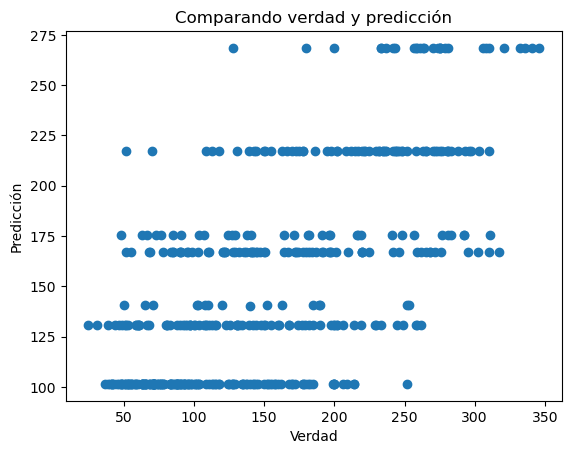

In [207]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [208]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

58.104137833598166

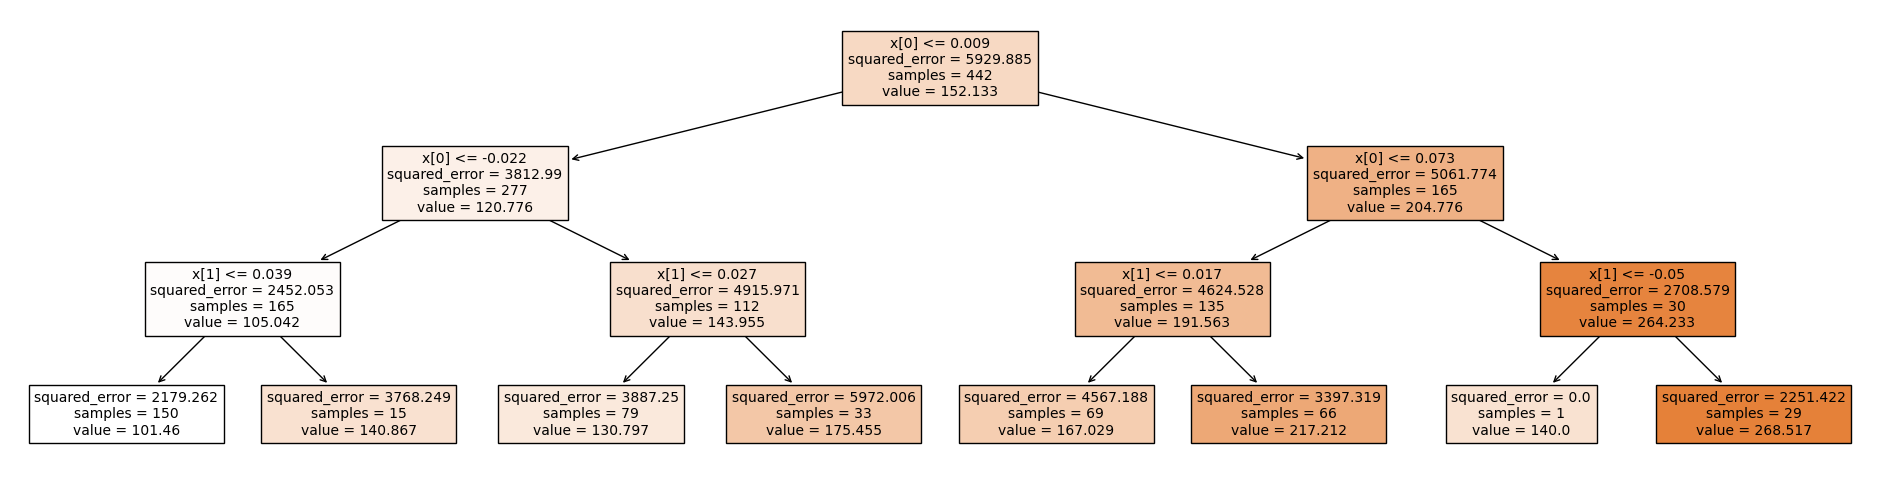

In [209]:
# Graficamos el arbol
plt.figure(figsize=(24,6))
plot_tree(regtree,filled=True,fontsize=10)
plt.savefig('arbol_dim_2.png')

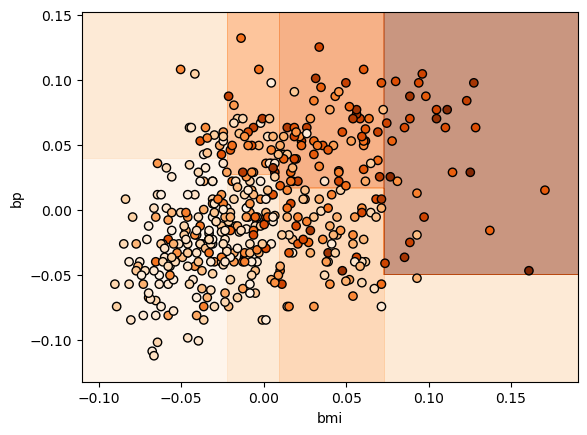

In [210]:
# Graficamos la hipotesis obtenida
ax = plt.subplot(1, 1, 1)
disp=DecisionBoundaryDisplay.from_estimator(
    regtree,
    X2,
    response_method="predict",
    ax=ax,
    xlabel=diabetes.feature_names[2],
    ylabel=diabetes.feature_names[3],
    eps=0.02,
    grid_resolution = 1000,
    alpha=0.5, 
    cmap='Oranges'
    )

# Plotting the data points    
disp.ax_.scatter(X2[:, 0], X2[:, 1], 
                 c=y, edgecolor="k",
                 cmap='Oranges')
plt.savefig('boundary_dim_2.png')